In [10]:
import pyspark
import pandas as pd
from pyspark.sql import SparkSession
from pyspark import SparkContext,SparkConf
sc = SparkContext.getOrCreate(SparkConf())

from pyspark.sql import SQLContext

sqlcontext = SQLContext(sc)

### Creating DataFrame with sparkSQL

In [2]:
sac_crime=sqlcontext.read.format('csv').options(header='true', inferSchema='true').load (r"C:\Users\Poojitha\Desktop\protofolio\SacramentocrimeJanuary2006.csv")

In [3]:
sac_crime.show(10)

+-----------+-------------------+--------+----------+----+--------------------+-------------+-----------+------------+
|  cdatetime|            address|district|      beat|grid|          crimedescr|ucr_ncic_code|   latitude|   longitude|
+-----------+-------------------+--------+----------+----+--------------------+-------------+-----------+------------+
|1/1/06 0:00| 3108 OCCIDENTAL DR|       3|3C        |1115|10851(A)VC TAKE V...|         2404|38.55042047|-121.3914158|
|1/1/06 0:00|2082 EXPEDITION WAY|       5|5A        |1512|459 PC  BURGLARY ...|         2204|38.47350069|-121.4901858|
|1/1/06 0:00|         4 PALEN CT|       2|2A        | 212|10851(A)VC TAKE V...|         2404|38.65784584|-121.4621009|
|1/1/06 0:00|     22 BECKFORD CT|       6|6C        |1443|476 PC PASS FICTI...|         2501|38.50677377|-121.4269508|
|1/1/06 0:00|   3421 AUBURN BLVD|       2|2A        | 508|459 PC  BURGLARY-...|         2299| 38.6374478|-121.3846125|
|1/1/06 0:00| 5301 BONNIEMAE WAY|       6|6B    

### Register the dataframe as a table

In [4]:
sac_crime.registerTempTable("Sac_crime_2006")

In [8]:
# Number of crimes for each district
sqlcontext.sql('select count(*)as crime, district from Sac_crime_2006 group by district order by district').show()

+-----+--------+
|crime|district|
+-----+--------+
|  868|       1|
| 1462|       2|
| 1575|       3|
| 1161|       4|
| 1159|       5|
| 1359|       6|
+-----+--------+



In [9]:
#number of crimes for each kind of crime
sqlcontext.sql('select count(*)as total, ucr_ncic_code from Sac_crime_2006 group by ucr_ncic_code order by ucr_ncic_code ').show()

+-----+-------------+
|total|ucr_ncic_code|
+-----+-------------+
|    2|          909|
|    3|          999|
|    1|         1099|
|   20|         1210|
|    1|         1211|
|   18|         1212|
|  146|         1299|
|    1|         1310|
|   99|         1313|
|  225|         1315|
|   18|         1602|
|   14|         2099|
|  135|         2203|
|  356|         2204|
|    6|         2206|
|  474|         2299|
|    4|         2301|
|    2|         2302|
|  176|         2303|
|   12|         2304|
+-----+-------------+
only showing top 20 rows



In [21]:
# remove  unnecessary columns
sac_df= sac_crime.toPandas()

sac_df.drop(['address','crimedescr'], inplace= True, axis=1)
sac_df.head()

,cdatetime,district,beat,grid,ucr_ncic_code,latitude,longitude
0,1/1/06 0:00,3,3C,1115,2404,38.550420,-121.391416
1,1/1/06 0:00,5,5A,1512,2204,38.473501,-121.490186
2,1/1/06 0:00,2,2A,212,2404,38.657846,-121.462101
3,1/1/06 0:00,6,6C,1443,2501,38.506774,-121.426951
4,1/1/06 0:00,2,2A,508,2299,38.637448,-121.384613


In [34]:
# Check if any NaN values in data
sac_df.info()
sac_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7584 entries, 0 to 7583
Data columns (total 9 columns):
cdatetime        7584 non-null datetime64[ns]
district         7584 non-null int32
beat             7584 non-null object
grid             7584 non-null int32
ucr_ncic_code    7584 non-null int32
latitude         7584 non-null float64
longitude        7584 non-null float64
month            7584 non-null object
week_day         7584 non-null object
dtypes: datetime64[ns](1), float64(2), int32(3), object(3)
memory usage: 444.5+ KB


cdatetime        0
district         0
beat             0
grid             0
ucr_ncic_code    0
latitude         0
longitude        0
month            0
week_day         0
dtype: int64

In [27]:
#  since there are no null values, let's convert the datetime to python format to dig into analysis
sac_df['cdatetime']= pd.to_datetime(sac_df['cdatetime'],infer_datetime_format=True)


In [35]:
# add new column month and week_day to create group by 
import calendar
sac_df['month']= (sac_df['cdatetime'].dt.month).apply(lambda x:calendar.month_abbr[x])
sac_df['week_day']= (sac_df['cdatetime'].dt.weekday_name)
sac_df['year']= (sac_df['cdatetime'].dt.year)
sac_df.head()


,cdatetime,district,beat,grid,ucr_ncic_code,latitude,longitude,month,week_day,year
0,2006-01-01,3,3C,1115,2404,38.550420,-121.391416,Jan,Sunday,2006
1,2006-01-01,5,5A,1512,2204,38.473501,-121.490186,Jan,Sunday,2006
2,2006-01-01,2,2A,212,2404,38.657846,-121.462101,Jan,Sunday,2006
3,2006-01-01,6,6C,1443,2501,38.506774,-121.426951,Jan,Sunday,2006
4,2006-01-01,2,2A,508,2299,38.637448,-121.384613,Jan,Sunday,2006


## Exploratory Data Analysis with Visualizations

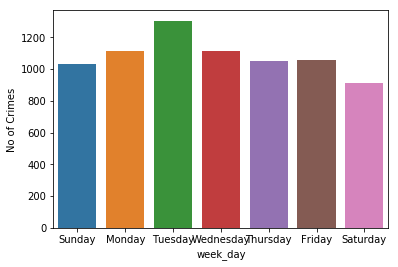

In [39]:
# crimes each week day
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
sn.countplot(x='week_day', data= sac_df)
plt.ylabel('No of Crimes')
plt.show()


In [46]:
# Looks like tuesday has recorded more crimes compared to other days in Sacramento
# Let's have look at types of crimes occured
sac_df.groupby(['ucr_ncic_code']).count()

,cdatetime,district,beat,grid,latitude,longitude,month,week_day,year
ucr_ncic_code,,,,,,,,,
909,2,2,2,2,2,2,2,2,2
999,3,3,3,3,3,3,3,3,3
1099,1,1,1,1,1,1,1,1,1
1210,20,20,20,20,20,20,20,20,20
1211,1,1,1,1,1,1,1,1,1
1212,18,18,18,18,18,18,18,18,18
1299,146,146,146,146,146,146,146,146,146
1310,1,1,1,1,1,1,1,1,1
1313,99,99,99,99,99,99,99,99,99
